### Extracting zip file


In [2]:
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [3]:
dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


Counting the number of files images in train folder

In [4]:
import os

print("The number of images: ",len(os.listdir('train/')))

The number of images:  25000


In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from cv2 import imshow

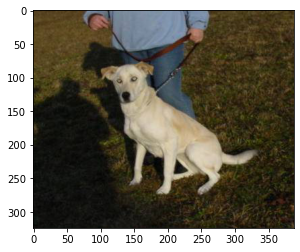

In [6]:
img = mpimg.imread('train/dog.1685.jpg')
imgplt = plt.imshow(img)
plt.show()

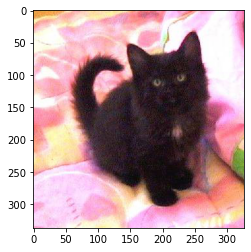

In [7]:
img = mpimg.imread('train/cat.1685.jpg')
imgplt = plt.imshow(img)
plt.show()

In [9]:
file_names = os.listdir('train/')

dog_count = 0

for img_file in file_names:
    if(img_file[0:3] == 'dog'):
        dog_count += 1
 
print("Total number of images:", len(file_names))
print("Number of dog images: ", dog_count)
print("Number of cat images: ", len(file_names)-dog_count)

Total number of images: 25000
Number of dog images:  12500
Number of cat images:  12500


Resizing and saving the images in separate folder

In [11]:
# Creating a directory for resized images
os.mkdir('train-resized')

In [12]:
original_folder = 'train/'
resized_folder = 'train-resized/'

# for cat images
for i in range(1000):
    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename
    
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    
    newImgPath = resized_folder+filename
    img.save(newImgPath)
    

In [13]:
# for dog images
for i in range(12500, 13500):
    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename
    
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    
    newImgPath = resized_folder+filename
    img.save(newImgPath)

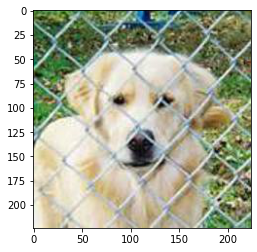

In [14]:
# displaying the resized images
img = mpimg.imread('train-resized/dog.10783.jpg')
imgplt = plt.imshow(img)
plt.show()

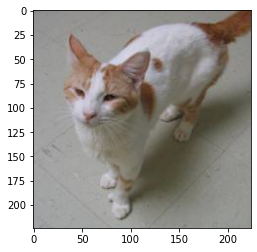

In [15]:
# displaying the resized images
img = mpimg.imread('train-resized/cat.1072.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats.

- Cat -> 0

- Dog -> 1

In [18]:
filenames = os.listdir('train-resized/')

labels = []

for i in range(2000):
    file_name = filenames[i]
    label = file_name[0:3]
    
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

Counting the images of dogs and cats out of 2000 images

In [22]:
values, counts = np.unique(labels, return_counts=True)

print(values)
print(counts)

[0 1]
[1000 1000]


Converting all the resized images to numpy arrays

In [23]:
import cv2
import glob

In [24]:
image_directory = 'train-resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [34]:
dog_cat_images

array([[[[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [124, 203, 246],
         [122, 200, 246],
         [122, 200, 246]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [124, 203, 246],
         [123, 201, 247],
         [122, 200, 246]],

        [[ 87, 163, 205],
         [ 89, 165, 207],
         [ 92, 168, 210],
         ...,
         [124, 204, 245],
         [123, 202, 245],
         [123, 202, 245]],

        ...,

        [[ 55, 123, 160],
         [ 55, 123, 160],
         [ 56, 124, 161],
         ...,
         [  0,   1,   1],
         [  0,   1,   1],
         [  0,   1,   1]],

        [[ 53, 121, 158],
         [ 54, 122, 159],
         [ 55, 123, 160],
         ...,
         [  0,   1,   1],
         [  0,   1,   1],
         [  0,   1,   1]],

        [[ 52, 120, 157],
         [ 52, 120, 157],
         [ 53, 121, 158],
         ...,
         [  0,   1,   1],
        

In [25]:
type(dog_cat_images)

numpy.ndarray

In [26]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [28]:
X = dog_cat_images
Y = np.asarray(labels)

# Train Test Split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [32]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 224, 224, 3)
(1600, 224, 224, 3)
(400, 224, 224, 3)
(1600,)
(400,)


# Normalizing the data

In [33]:
X_train = X_train/255
X_test = X_test/255

# Building the Neural Network

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

In [38]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [41]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


# Compiling the model

In [44]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['acc']
)

# Fitting the model

In [47]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 43s 801ms/step - loss: 0.0729 - acc: 0.9750
Epoch 2/5
50/50 [==============================] - 37s 732ms/step - loss: 0.0526 - acc: 0.9831
Epoch 3/5
50/50 [==============================] - 37s 734ms/step - loss: 0.0408 - acc: 0.9869
Epoch 4/5
50/50 [==============================] - 36s 713ms/step - loss: 0.0322 - acc: 0.9919
Epoch 5/5
50/50 [==============================] - 36s 717ms/step - loss: 0.0280 - acc: 0.9937


# Evaluating the model

In [48]:
score, acc = model.evaluate(X_test, Y_test)

13/13 [==============================] - 12s 798ms/step - loss: 0.0671 - acc: 0.9850


In [49]:
print('Test Loss = ', score)
print('Test Accuracy = ', acc)

Test Loss =  0.06710150092840195
Test Accuracy =  0.9850000143051147


# Predictive System

In [60]:
def predictImg(input_image_path):
    input_image = cv2.imread(input_image_path)

    imgplt = plt.imshow(input_image)
    plt.show()

    input_image_resize = cv2.resize(input_image, (224, 224))

    input_image_scaled = input_image_resize/255

    image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

    input_prediction = model.predict(image_reshaped)

    input_pred_label = np.argmax(input_prediction)

    if(input_pred_label == 1):
        print("The image represents Dog.")
    else:
        print("The image represents Cat.")

Path of the image to be predicted: C:/Users/anant/OneDrive/Documents/GitHub/Deep_Learning/Processing-image-data/Images/cat.jpg


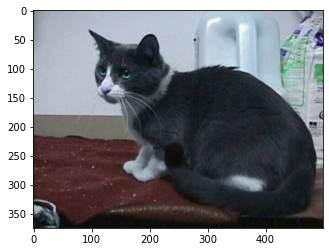

1/1 [==============================] - 0s 42ms/step
The image represents Cat.


In [61]:
input_image_path = input('Path of the image to be predicted: ')
predictImg(input_image_path)

Path of the image to be predicted: C:/Users/anant/OneDrive/Documents/GitHub/Deep_Learning/Processing-image-data/Images/puppy.jpg


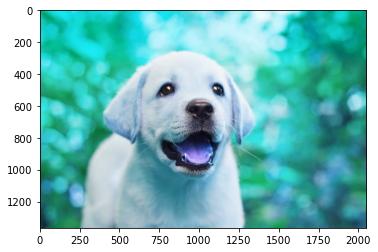

1/1 [==============================] - 0s 42ms/step
The image represents Dog.


In [62]:
input_image_path = input('Path of the image to be predicted: ')
predictImg(input_image_path)